# TEAM 
# Student Name : SRN
## A Narendiran : PES1UG19CS001
## Adithya P       : PES1UG19CS028
## Abhishek D    : PES1UG19CS020

# CODE TO RANDOMLY GENERATE POLYGONS

In [ ]:
from shapely.geometry import Polygon
from shapely.geometry.polygon import LinearRing, Polygon
from cyaron import *
import csv
import time
import math




def mainFunct(n,fileNum):
    with open('polygon'+fileNum+'.csv', 'w', newline='\n') as file:
        writer = csv.writer(file)
        writer.writerow(['header'])
    for i in range(n):
      #n = number of polygons
      #a = number of vertices
      a= randrange(10, 501)
      p = (Polygon.simple_polygon(Vector.random(a, [(i+1, n+2), (i+1, n+2)], 2)).points)
      
      p=list(map(lambda x:tuple(x),p))

      #get the centroid of the polygon
      cent=(sum([e[0] for e in p])/len(p),sum([e[1] for e in p])/len(p))
      
      # sort coordinates by polar angle of the line passing through the centroid and the coordinate
      p.sort(key=lambda e: math.atan2(e[1]-cent[1],e[0]-cent[0]))

      #start and end points are the same
      p.append(p[0])

      #make copy of p
      poly = p

      #To construct the string to append to the csv file
      polystring = "POLYGON(("
      for j in range(len(poly)):
        polystring += f"{poly[j][0]} {poly[j][1]}, "
      polystring += "))"
      
      with open('polygon'+fileNum+'.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([polystring])

for n in range(1000, 11001, 1000):
    start = time.time()
    mainFunct(n,str(n))
    end = time.time()
    totaltime = (end - start);
    file  = open("Time.txt","a")
    file.write(str(n) + " : " + str(totaltime)+"\n")

# PLOTTING THE SIZE VS TIME GRAPH

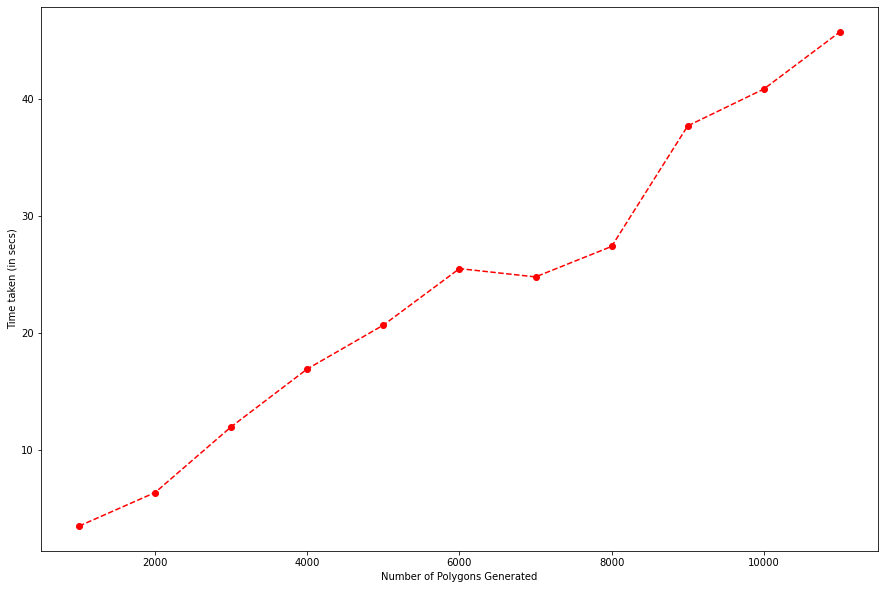

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot 
file1 = open("Time.txt","r")
x,y = [],[]
text = file1.readlines()
for line in text:
    
    #Extracting size and time values from Time.txt file
    read_line = line.split(':')
    read_line[1] = read_line[1].strip("\n")
    
    #storing the number of polygons in x and time taken to generate polygons in y
    x.append(float(read_line[0]))
    y.append(float(read_line[1]))

plt.figure(figsize=(15,10))
plt.xlabel("Number of Polygons Generated")
plt.ylabel("Time taken (in secs)")
plt.plot(x,y,"o--r")
plt.show()

# To calculate the size of each .csv file generated for n polygons generated and plot graph (size of file vs number of polygons)

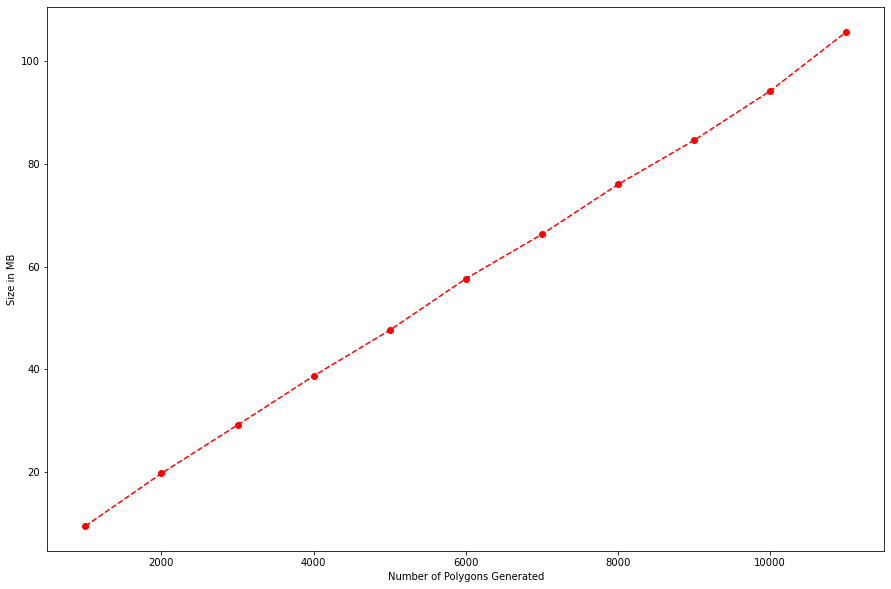

In [ ]:

from pathlib import Path
#stores the size of polygon.csv files
size = []
for n in range(1000,11001,1000):
    num = str(n)
    # getting file size
    file=Path(r'polygon'+num+'.csv').stat().st_size

    #calculating file size of Polygons generated at each iteration
    fileSize = file/(10**6)
    size.append(fileSize)
    
plt.figure(figsize=(15,10))
plt.xlabel("Number of Polygons Generated")
plt.ylabel("Size in MB")
plt.plot(x,size,"o--r")
plt.show()